In [171]:
#import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [172]:
#load the data
df = pd.read_csv('Dodgers.csv')

In [173]:
#view first 5 rows
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [186]:
# summary
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


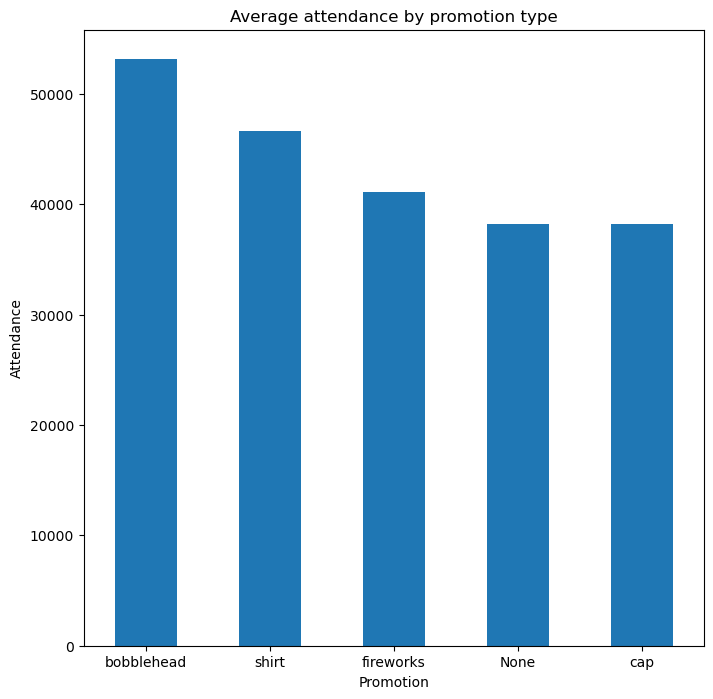

In [174]:
# Using group by to come to conclusion on attendence with other promotional variables
df1 = df.groupby(['cap','shirt','fireworks','bobblehead']).attend.mean().sort_values(ascending = False).plot.bar()
df1.set_xticklabels(labels = ['bobblehead','shirt','fireworks','None','cap'], rotation = 0 )
df1.set_xlabel('Promotion')
df1.set_ylabel("Attendance")
df1.set_title("Average attendance by promotion type")
plt.show()

In [175]:
# create new dataframe using month and attend columns and day of week
df_month = df[['month','attend']]
df_week = df[['day_of_week','attend']]

### Boxplot

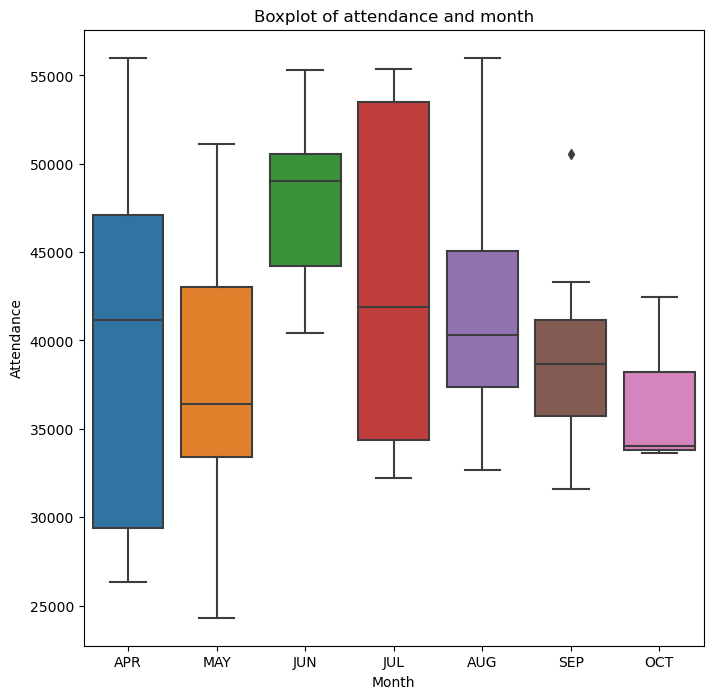

In [176]:
#boxplot using attend and month columns
sns.boxplot(x= 'month',  y ='attend',data = df_month)
plt.xlabel('Month')
plt.ylabel("Attendance")
plt.title("Boxplot of attendance and month")
plt.show()

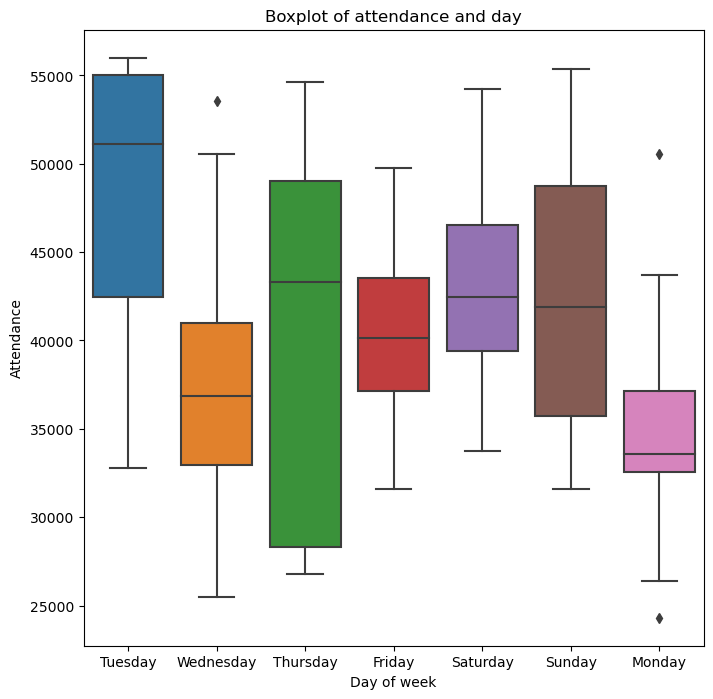

In [177]:
#boxplot using attend and month columns
sns.boxplot(x= 'day_of_week',  y ='attend',data = df_week)
plt.xlabel('Day of week')
plt.ylabel("Attendance")
plt.title("Boxplot of attendance and day")
plt.show()

### Scatterplot

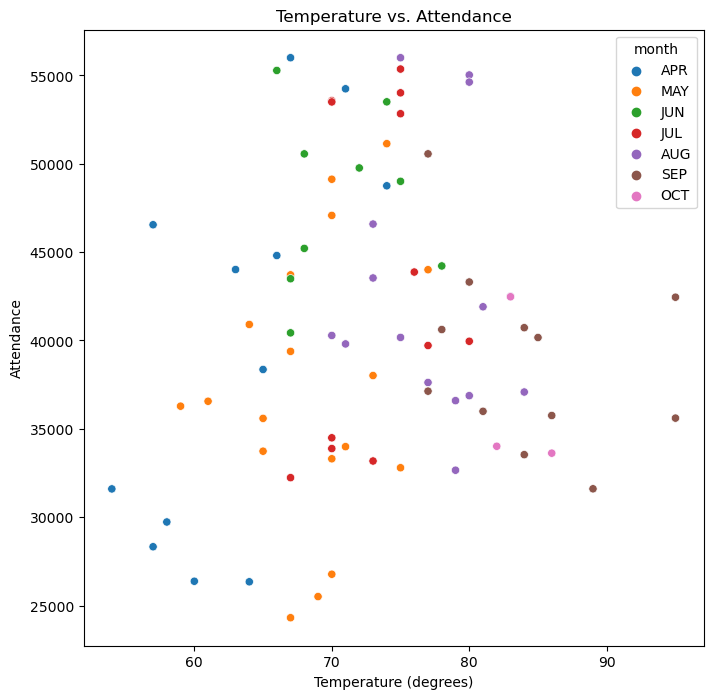

In [178]:
# set figure size
plt.rcParams['figure.figsize'] = (8,8)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

#sns scatterplot
sns.scatterplot(y='attend',x='temp', hue='month', 
             data=df).set_title('Temperature vs. Attendance', size=12)
plt.xlabel('Temperature (degrees)', size=10)
plt.ylabel('Attendance', size=10)
plt.show()

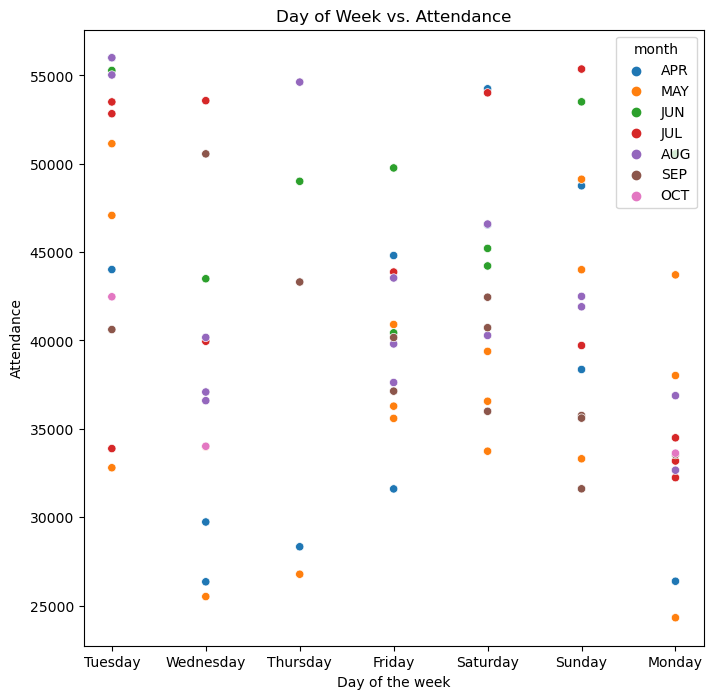

In [179]:
# set figure size
plt.rcParams['figure.figsize'] = (8,8)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

#sns scatterplot
sns.scatterplot(y='attend',x='day_of_week', hue='month', 
             data=df).set_title('Day of Week vs. Attendance', size=12)
plt.xlabel('Day of the week', size=10)
plt.ylabel('Attendance', size=10)
plt.show()

In [180]:
# summary based on month and attendance
df.groupby('month').describe()['attend']

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
APR,12.0,39591.916667,10882.001583,26345.0,29378.75,41186.5,47100.00,56000.0
AUG,15.0,42751.533333,7256.695921,32659.0,37353.00,40284.0,45062.50,56000.0
JUL,12.0,43884.250000,9399.324716,32238.0,34340.75,41914.0,53516.00,55359.0
JUN,9.0,47940.444444,4919.203063,40432.0,44217.00,49006.0,50559.00,55279.0
MAY,18.0,37345.722222,7721.822307,24312.0,33413.25,36422.0,43011.25,51137.0
OCT,3.0,36703.666667,5000.193030,33624.0,33819.00,34014.0,38243.50,42473.0
SEP,12.0,38955.083333,5135.247758,31607.0,35717.25,38650.0,41155.25,50560.0


#### Based on above data with both boxplot and summary statistics, it seems that June has the highest attendance with mean being 49,940 attendees. June has the high range of attendees ranging from 40,432 to maximum of 55,279.

In [181]:
# convert categorical to numericalof promotional type
df['cap'] = df['cap'].str.replace('NO', '0')
df['cap'] = df['cap'].str.replace('YES', '1')
df.astype({"cap": 'int64'})

df['shirt'] = df['shirt'].str.replace('NO', '0')
df['shirt'] = df['shirt'].str.replace('YES', '1')
df.astype({"shirt": 'int64'})

df['fireworks'] = df['fireworks'].str.replace('NO', '0')
df['fireworks'] = df['fireworks'].str.replace('YES', '1')
df.astype({"fireworks": 'int64'})

df['bobblehead'] = df['bobblehead'].str.replace('NO', '0')
df['bobblehead'] = df['bobblehead'].str.replace('YES', '1')
df.astype({"bobblehead": 'int64'})

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0,0,0,0
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,0,0,0,0
78,OCT,1,33624,Monday,Giants,86,Clear,Night,0,0,0,0
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0,0,0,0


In [182]:
#save the filtered dataframe to be used in R
df.to_csv(r'dodgers_new.csv', index = False)